In [1]:
!git clone https://github.com/sumsumsp/Deep_Learning_Pytorch.git

fatal: destination path 'Deep_Learning_Pytorch' already exists and is not an empty directory.


In [2]:
!pip install git+https://github.com/albumentations-team/albumentations.git


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-2oidorkp
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-2oidorkp
  Created wheel for albumentations: filename=albumentations-1.0.1-cp37-none-any.whl size=98530 sha256=5d695db2d88a5240880f24c83e118fe1f10c87bd4ff0c391a46db225b6d0452f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8tvlfu0b/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [3]:
import sys, os
my_path = '/content/Deep_Learning_Pytorch'
sys.path.append(my_path)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from model.resnet import ResNet18
from main import *
from utils import *



Files already downloaded and verified
Files already downloaded and verified


In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")



In [6]:
model = ResNet18().to(device)


In [7]:
epochs = 40
lr = 0.001
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=8, verbose=True)
criterion = nn.CrossEntropyLoss()

In [8]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3, 32, 32))  # Display model summary



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

In [9]:
#!pip install hypothesis


In [10]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100.*correct/len(test_loader.dataset)


In [11]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]


for epoch in range(epochs):
    print(f"Epoch {epoch}")
   
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch, criterion)

    test_loss,test_acc = test(model,device,  testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 0


loss=1.8676389455795288 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0158, Accuracy: 12127/50000 (24.25%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.0586, Accuracy: 3165/10000 (31.65%)

Epoch 1


loss=1.6754270792007446 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.85it/s]


Train set: Average loss: 0.0137, Accuracy: 17560/50000 (35.12%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.7338, Accuracy: 3848/10000 (38.48%)

Epoch 2


loss=1.8621248006820679 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.85it/s]


Train set: Average loss: 0.0126, Accuracy: 20467/50000 (40.93%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.0218, Accuracy: 4494/10000 (44.94%)

Epoch 3


loss=1.4589837789535522 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.85it/s]


Train set: Average loss: 0.0117, Accuracy: 22646/50000 (45.29%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.5638, Accuracy: 5198/10000 (51.98%)

Epoch 4


loss=1.3053028583526611 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.85it/s]


Train set: Average loss: 0.0109, Accuracy: 24521/50000 (49.04%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.8499, Accuracy: 5550/10000 (55.50%)

Epoch 5


loss=1.4055052995681763 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0102, Accuracy: 26328/50000 (52.66%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.1096, Accuracy: 5772/10000 (57.72%)

Epoch 6


loss=1.4074070453643799 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0096, Accuracy: 27838/50000 (55.68%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.5597, Accuracy: 5810/10000 (58.10%)

Epoch 7


loss=1.04705011844635 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0092, Accuracy: 28900/50000 (57.80%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.5050, Accuracy: 6333/10000 (63.33%)

Epoch 8


loss=0.9893921613693237 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0084, Accuracy: 30565/50000 (61.13%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0099, Accuracy: 6439/10000 (64.39%)

Epoch 9


loss=0.8171995878219604 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0082, Accuracy: 31363/50000 (62.73%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0754, Accuracy: 6343/10000 (63.43%)

Epoch 10


loss=0.9380043745040894 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0076, Accuracy: 32542/50000 (65.08%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.2132, Accuracy: 6933/10000 (69.33%)

Epoch 11


loss=0.790594756603241 batch_id=390: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]


Train set: Average loss: 0.0073, Accuracy: 33478/50000 (66.96%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.6615, Accuracy: 7034/10000 (70.34%)

Epoch 12


loss=0.7585653066635132 batch_id=390: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]


Train set: Average loss: 0.0069, Accuracy: 34569/50000 (69.14%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.9965, Accuracy: 7108/10000 (71.08%)

Epoch 13


loss=0.7387370467185974 batch_id=390: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]


Train set: Average loss: 0.0066, Accuracy: 35207/50000 (70.41%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.9983, Accuracy: 7303/10000 (73.03%)

Epoch 14


loss=0.7266136407852173 batch_id=390: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]


Train set: Average loss: 0.0064, Accuracy: 35566/50000 (71.13%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1594, Accuracy: 7487/10000 (74.87%)

Epoch 15


loss=0.9985149502754211 batch_id=390: 100%|██████████| 391/391 [02:19<00:00,  2.80it/s]


Train set: Average loss: 0.0061, Accuracy: 36220/50000 (72.44%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2249, Accuracy: 7477/10000 (74.77%)

Epoch 16


loss=0.7925717830657959 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0059, Accuracy: 36891/50000 (73.78%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2160, Accuracy: 7456/10000 (74.56%)

Epoch 17


loss=0.5734909772872925 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0057, Accuracy: 37308/50000 (74.62%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5439, Accuracy: 7621/10000 (76.21%)

Epoch 18


loss=0.9711763262748718 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0056, Accuracy: 37377/50000 (74.75%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5501, Accuracy: 7767/10000 (77.67%)

Epoch 19


loss=0.6186760663986206 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0054, Accuracy: 37964/50000 (75.93%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7334, Accuracy: 7705/10000 (77.05%)

Epoch 20


loss=0.7190467119216919 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0053, Accuracy: 38091/50000 (76.18%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7141, Accuracy: 7686/10000 (76.86%)

Epoch 21


loss=0.6499706506729126 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0051, Accuracy: 38618/50000 (77.24%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.8877, Accuracy: 8103/10000 (81.03%)

Epoch 22


loss=0.7031919956207275 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0050, Accuracy: 38853/50000 (77.71%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9398, Accuracy: 7755/10000 (77.55%)

Epoch 23


loss=0.6404942870140076 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]


Train set: Average loss: 0.0048, Accuracy: 39233/50000 (78.47%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9085, Accuracy: 7945/10000 (79.45%)

Epoch 24


loss=0.5424283146858215 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0047, Accuracy: 39525/50000 (79.05%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.3239, Accuracy: 8240/10000 (82.40%)

Epoch 25


loss=0.5381278395652771 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0046, Accuracy: 39729/50000 (79.46%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.5818, Accuracy: 8257/10000 (82.57%)

Epoch 26


loss=0.5153371095657349 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0044, Accuracy: 40046/50000 (80.09%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.4508, Accuracy: 8221/10000 (82.21%)

Epoch 27


loss=0.7344198822975159 batch_id=390: 100%|██████████| 391/391 [02:17<00:00,  2.83it/s]


Train set: Average loss: 0.0043, Accuracy: 40280/50000 (80.56%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.6728, Accuracy: 8323/10000 (83.23%)

Epoch 28


loss=0.5397557020187378 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0042, Accuracy: 40473/50000 (80.95%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.6744, Accuracy: 8068/10000 (80.68%)

Epoch 29


loss=0.5390773415565491 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0042, Accuracy: 40625/50000 (81.25%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.7473, Accuracy: 8052/10000 (80.52%)

Epoch 30


loss=0.6645799279212952 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0040, Accuracy: 41002/50000 (82.00%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.7636, Accuracy: 8186/10000 (81.86%)

Epoch 31


loss=0.5915881395339966 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0041, Accuracy: 40843/50000 (81.69%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.9258, Accuracy: 8230/10000 (82.30%)

Epoch 32


loss=0.597694993019104 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0039, Accuracy: 41341/50000 (82.68%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.9618, Accuracy: 8455/10000 (84.55%)

Epoch 33


loss=0.32283303141593933 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0038, Accuracy: 41550/50000 (83.10%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.1807, Accuracy: 8340/10000 (83.40%)

Epoch 34


loss=0.5911712050437927 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0038, Accuracy: 41643/50000 (83.29%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2875, Accuracy: 8423/10000 (84.23%)

Epoch 35


loss=0.35656243562698364 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0037, Accuracy: 41770/50000 (83.54%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2289, Accuracy: 8447/10000 (84.47%)

Epoch 36


loss=0.47242388129234314 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0035, Accuracy: 42064/50000 (84.13%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.4035, Accuracy: 8468/10000 (84.68%)

Epoch 37


loss=0.4657928943634033 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0035, Accuracy: 42202/50000 (84.40%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.3786, Accuracy: 8341/10000 (83.41%)

Epoch 38


loss=0.433002233505249 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.83it/s]


Train set: Average loss: 0.0035, Accuracy: 42248/50000 (84.50%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2720, Accuracy: 8403/10000 (84.03%)

Epoch 39


loss=0.44349947571754456 batch_id=390: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]


Train set: Average loss: 0.0033, Accuracy: 42591/50000 (85.18%)




Test set: Average loss: -7.7030, Accuracy: 8659/10000 (86.59%)



Text(0.5, 1.0, 'Loss per epoch')

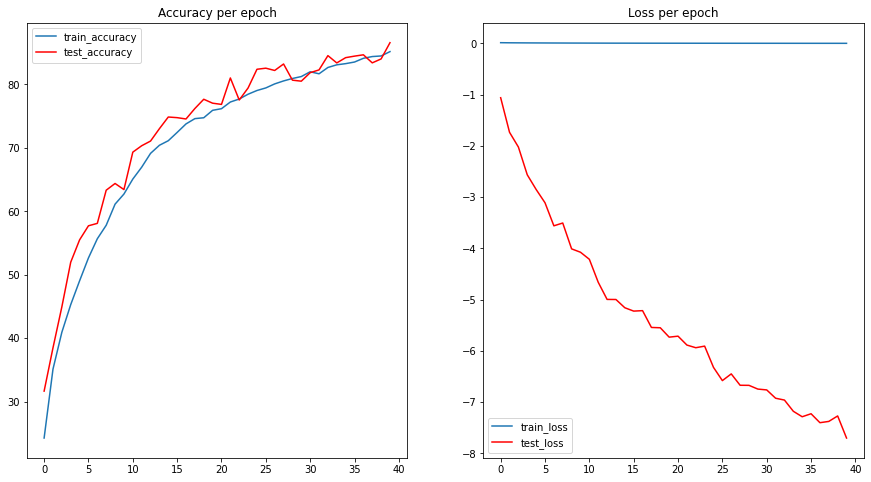

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

plt.subplot(1,2, 1)

plt.plot(np.array(train_accuracy_list))
plt.plot(np.array(test_accuracy_list), 'r')
plt.legend(["train_accuracy", "test_accuracy"])
plt.title("Accuracy per epoch")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.plot(test_loss_list, 'r')
plt.legend(["train_loss", "test_loss"])
plt.title("Loss per epoch")

In [47]:
from pylab import *

def getWrongPredictions(model, device, val_loader):
    wrong_idx = []
    wrong_samples = []
    wrong_preds = []
    actual_values = []

    for data,target in val_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)

        wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
        wrong_samples.append(data[wrong_idx])
        wrong_preds.append(pred[wrong_idx])
        actual_values.append(target.view_as(pred)[wrong_idx])
    return list(zip(torch.cat(wrong_samples),torch.cat(wrong_preds),torch.cat(actual_values)))

def plotWrongPredictions(wrong_predictions):
    fig = plt.figure(figsize=(10,10))
    mean,std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    for i, (sample, wrong_pred, actual_value) in enumerate(wrong_predictions[:20]):
        sample, wrong_pred, actual_value = sample.cpu().numpy(), wrong_pred.cpu(), actual_value.cpu()
        # Undo normalization
        for j in range(sample.shape[0]):
            sample[j] = (sample[j]*std[j])+mean[j]
        sample = np.transpose(sample, (1, 2, 0))
        ax = fig.add_subplot(4, 5, i+1)
        ax.axis('off')
        ax.set_title(f'actual {classes[actual_value.item()]}\npredicted {classes[wrong_pred.item()]}',fontsize=15)
        ax.imshow(sample)
    plt.show()
def imshow(img,c = "" ):    
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


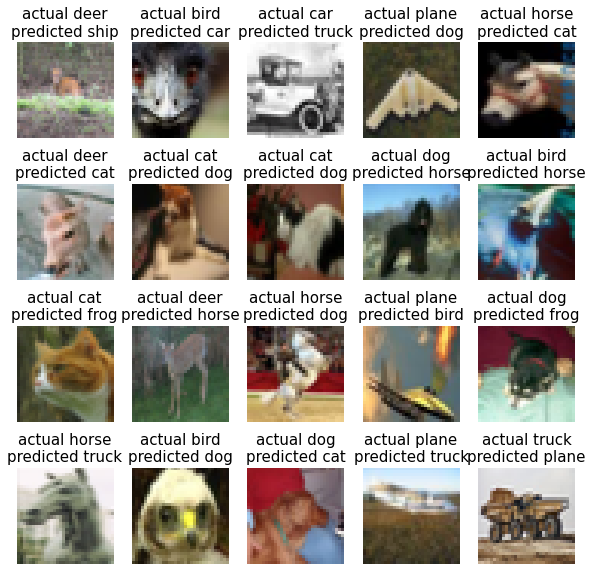

In [48]:
wp = getWrongPredictions(model, device, testloader)
plotWrongPredictions(wp)

In [19]:
!pip install pytorch-gradcam

     |████████████████████████████████| 6.0MB 3.7MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp37-none-any.whl size=5269 sha256=726aafbc83221cb78e4ec1c56874d15066ef4b4536e272ebd5afb89b29f3b9fc
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [49]:
configs = [
    dict(model_type='resnet', arch=model, layer_name='layer1'),
    dict(model_type='resnet', arch=model, layer_name='layer2'),
    dict(model_type='resnet', arch=model, layer_name='layer3'),
    dict(model_type='resnet', arch=model, layer_name='layer4'),
]

In [50]:

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]



In [51]:
def plotGradCam(wrong_predictions,cams):
    for i, (sample, wrong_pred, actual_value) in enumerate(wrong_predictions[:20]):
        torch_img = inv_norm(sample)
        normed_torch_img = sample[None]
        images = []
        for gradcam, gradcam_pp in cams:
            mask, _ = gradcam(normed_torch_img)
            heatmap, result = visualize_cam(mask, torch_img)

            mask_pp, _ = gradcam_pp(normed_torch_img)
            heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
            
            images.extend([torch_img.cpu(), heatmap, heatmap_pp, result, result_pp])
            
        grid_image = make_grid(images, nrow=5)
        imshow(grid_image)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


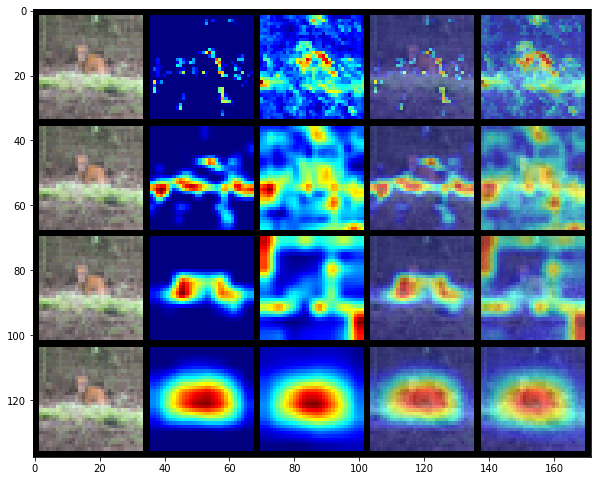

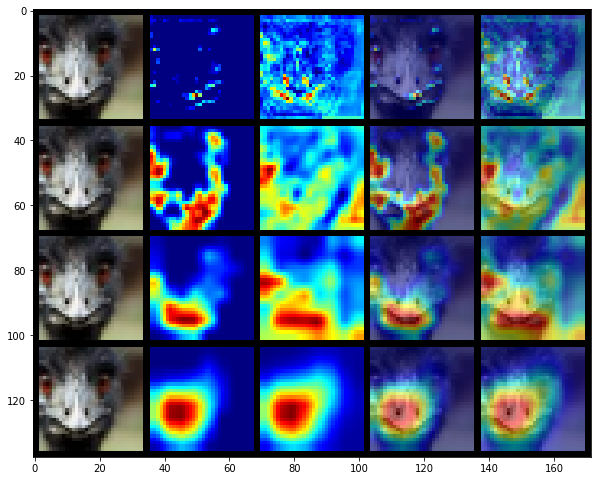

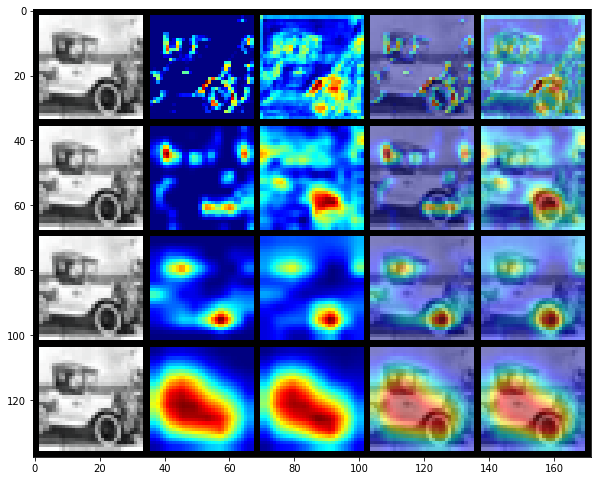

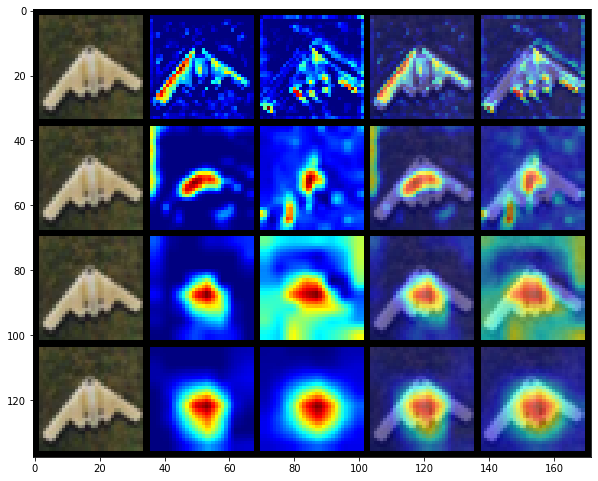

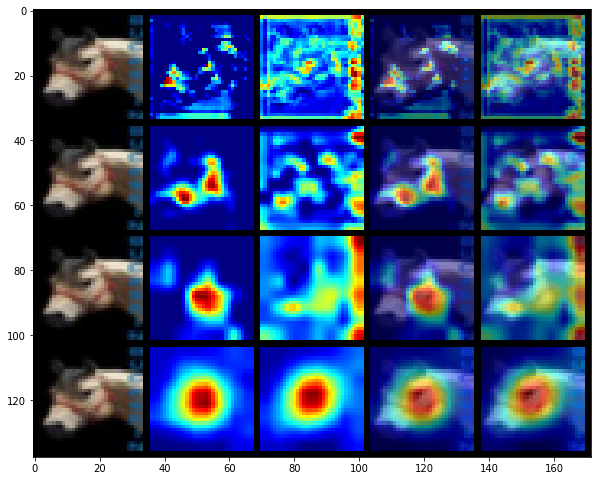

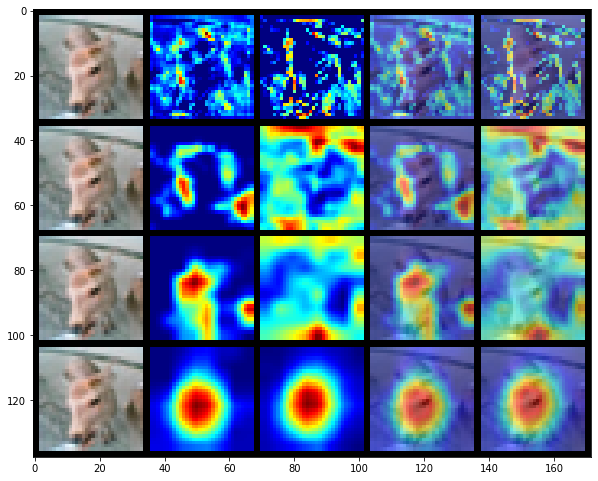

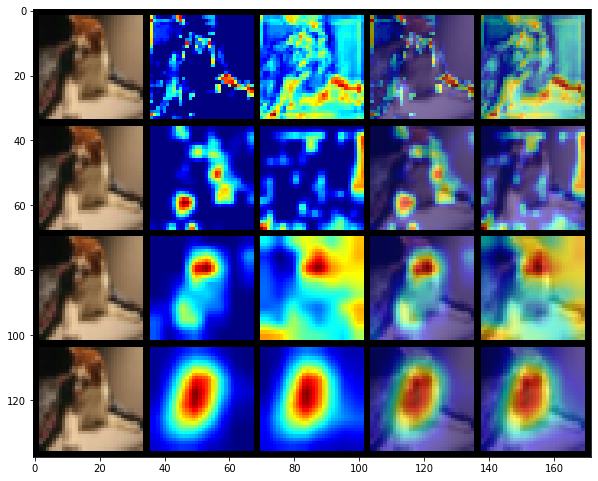

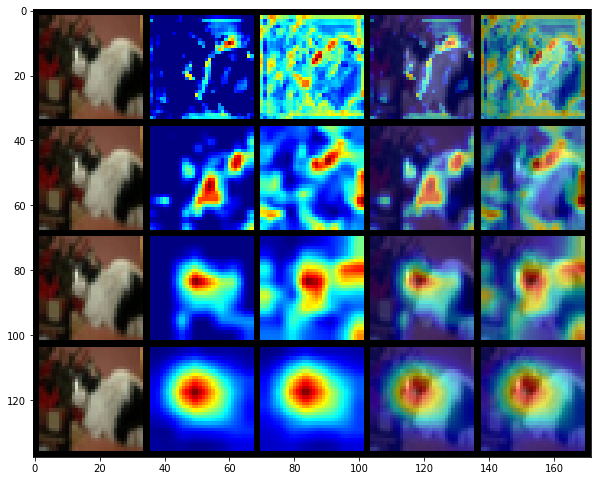

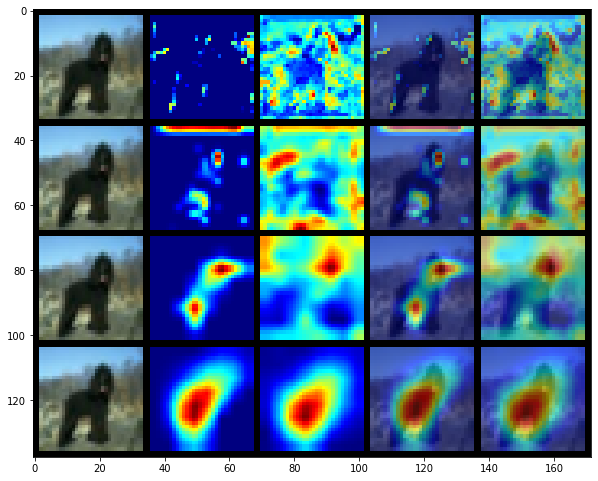

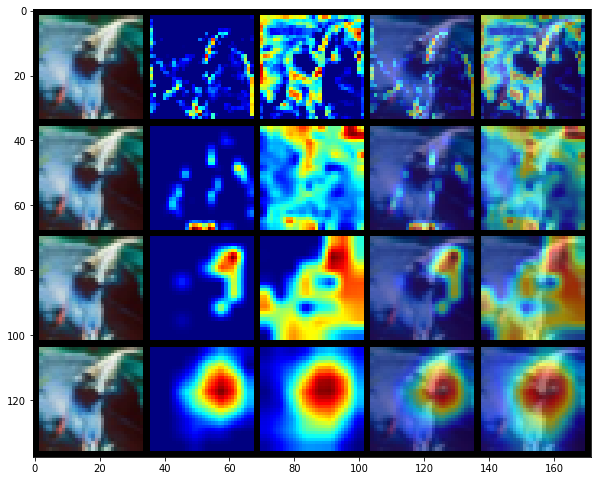

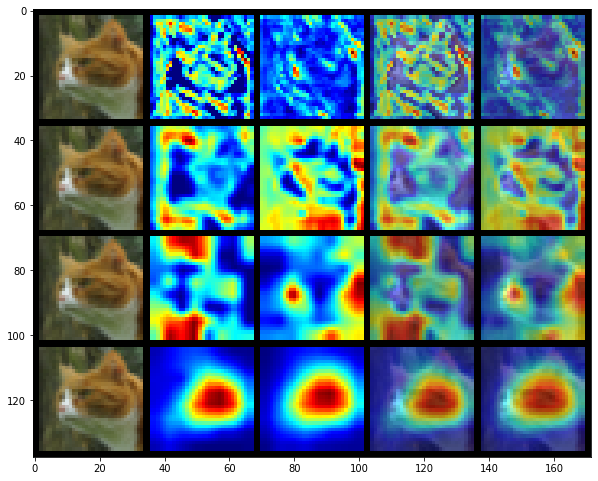

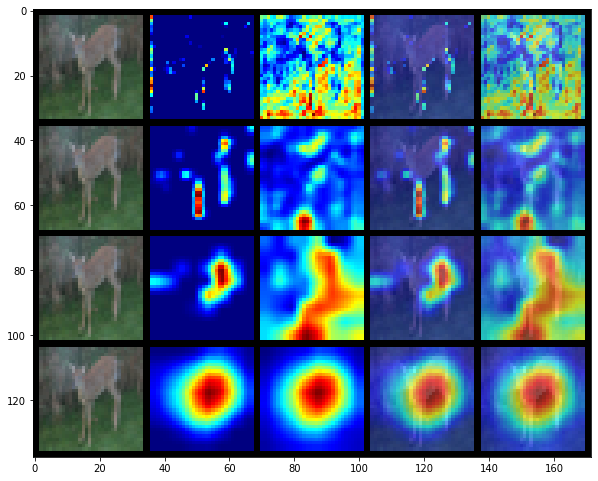

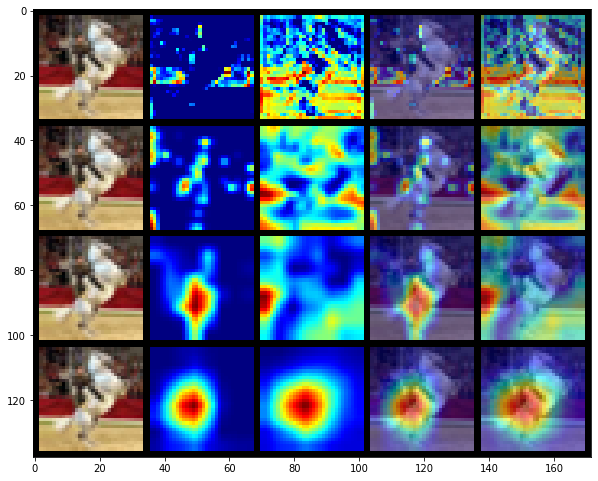

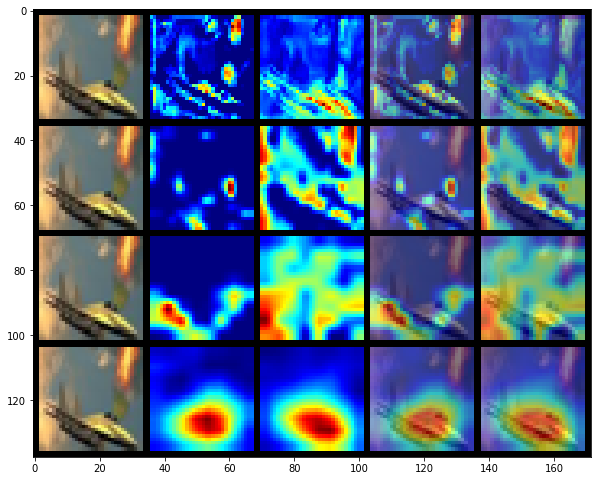

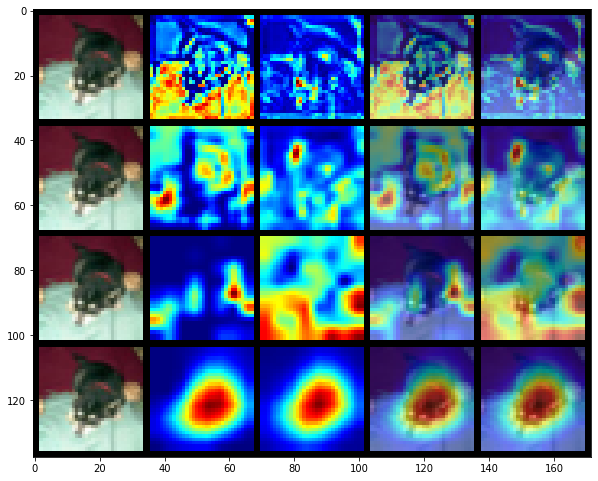

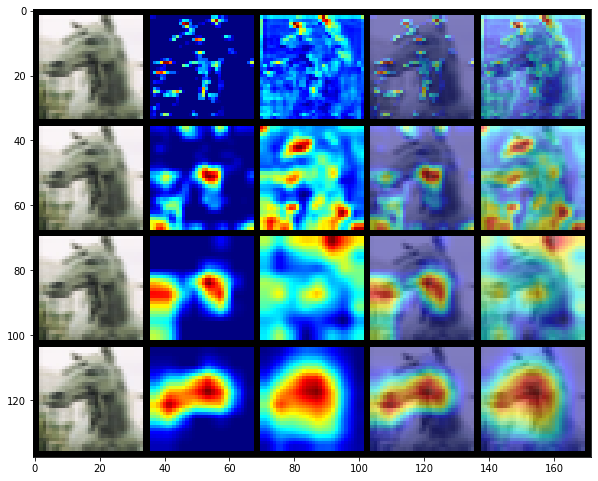

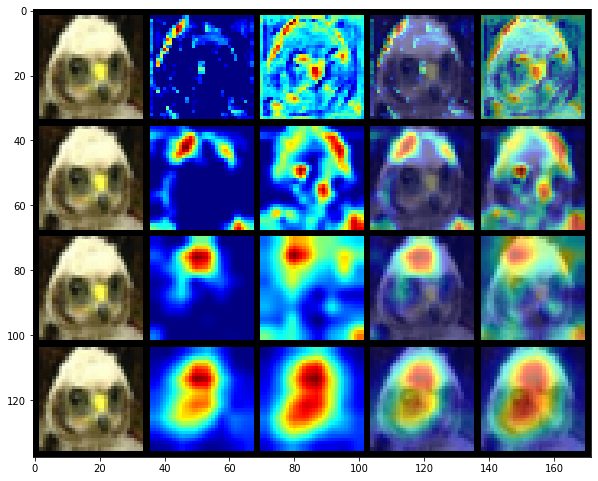

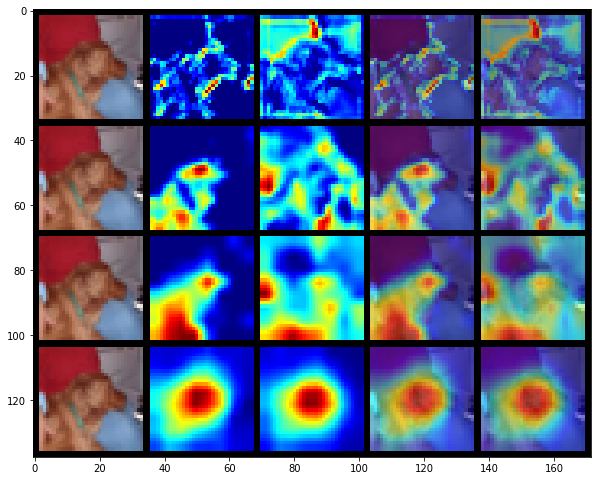

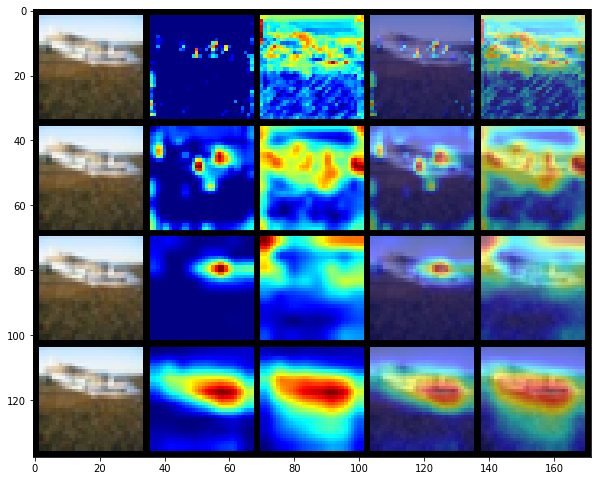

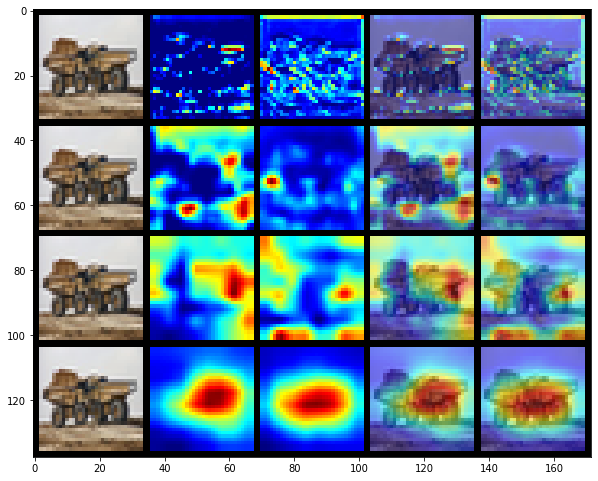

In [53]:
plotGradCam(wp[0:20], cams)